# Import libraries and verfiy data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
rawdata = pd.read_csv('impacts.csv')

In [4]:
rawdata.head()

,Object Name,Period Start,Period End,Possible Impacts,Cumulative Impact Probability,Asteroid Velocity,Asteroid Magnitude,Asteroid Diameter (km),Cumulative Palermo Scale,Maximum Palermo Scale,Maximum Torino Scale
0,2006 WP1,2017,2017,1,5.200000e-09,17.77,28.3,0.007,-8.31,-8.31,0
1,2013 YB,2017,2046,23,7.600000e-05,8.98,31.4,0.002,-6.60,-6.96,0
2,2008 US,2017,2062,30,1.600000e-05,18.33,31.4,0.002,-6.48,-6.87,0
3,2010 VR139,2017,2076,24,2.000000e-07,4.99,26.7,0.016,-6.83,-6.95,0
4,2015 ME131,2017,2096,85,2.300000e-08,19.46,19.2,0.497,-3.85,-4.30,0


# Estimate potential damage by mulitplying the objects velocity and diameter

Note: While this is far from a scientific method of estimating potential damage output, the more lucrative option of finding the objects kinetic energy has been taken from me, as there is no data on the objects total mass. Using this formula, Ke = (1/2)MV^2, one could find it's Kinetic energy and have a much more accurate depiction of it's potential damage upon impact. Using it's diameter is the next best solution, though the result is arbitrary. 

In [5]:
rawdata['Potential Damage'] = rawdata['Asteroid Velocity'] * rawdata['Asteroid Diameter (km)']

In [6]:
rawdata['Potential Damage'].head()

0    0.12439
1    0.01796
2    0.03666
3    0.07984
4    9.67162
Name: Potential Damage, dtype: float64

Ensure rawdata has been updated, as well as check the range of values in the Potential Damage collumn

In [7]:
rawdata.head()

,Object Name,Period Start,Period End,Possible Impacts,Cumulative Impact Probability,Asteroid Velocity,Asteroid Magnitude,Asteroid Diameter (km),Cumulative Palermo Scale,Maximum Palermo Scale,Maximum Torino Scale,Potential Damage
0,2006 WP1,2017,2017,1,5.200000e-09,17.77,28.3,0.007,-8.31,-8.31,0,0.12439
1,2013 YB,2017,2046,23,7.600000e-05,8.98,31.4,0.002,-6.60,-6.96,0,0.01796
2,2008 US,2017,2062,30,1.600000e-05,18.33,31.4,0.002,-6.48,-6.87,0,0.03666
3,2010 VR139,2017,2076,24,2.000000e-07,4.99,26.7,0.016,-6.83,-6.95,0,0.07984
4,2015 ME131,2017,2096,85,2.300000e-08,19.46,19.2,0.497,-3.85,-4.30,0,9.67162


In [8]:
max(rawdata["Potential Damage"])

47.91799999999999

In [9]:
min(rawdata["Potential Damage"])

0.0025

# Find and assign top ten damage values from rawdata dataframe

In [10]:
topten = rawdata.nlargest(10, 'Potential Damage')

In [11]:
topten

,Object Name,Period Start,Period End,Possible Impacts,Cumulative Impact Probability,Asteroid Velocity,Asteroid Magnitude,Asteroid Diameter (km),Cumulative Palermo Scale,Maximum Palermo Scale,Maximum Torino Scale,Potential Damage
58,2010 AU118,2020,2112,38,1.800000e-08,25.22,16.2,1.900,-2.73,-3.16,0,47.91800
173,2011 SR52,2034,2115,4,7.600000e-10,13.55,15.6,2.579,-4.35,-4.59,0,34.94545
54,2001 CA21,2020,2077,6,6.500000e-09,30.68,18.5,0.679,-3.98,-4.25,0,20.83172
682,29075 (1950 DA),2880,2880,1,1.200000e-04,14.10,17.6,1.300,-1.42,-1.42,(*),18.33000
225,2017 CH1,2044,2044,1,2.300000e-10,18.19,17.9,0.900,-5.76,-5.76,0,16.37100
305,1979 XB,2056,2113,5,9.900000e-07,23.63,18.6,0.657,-2.75,-3.07,0,15.52491
4,2015 ME131,2017,2096,85,2.300000e-08,19.46,19.2,0.497,-3.85,-4.30,0,9.67162
277,2011 BT59,2052,2091,3,1.100000e-07,37.84,20.8,0.240,-4.21,-4.22,0,9.08160
344,2010 CR5,2062,2075,3,7.600000e-08,23.60,19.8,0.372,-4.25,-4.28,0,8.77920
587,2005 GV190,2099,2099,1,1.200000e-10,9.25,18.0,0.870,-6.84,-6.84,0,8.04750


# Create and save plot!

Text(0.5,0,'Potential Damage (Velocity * Diameter)')

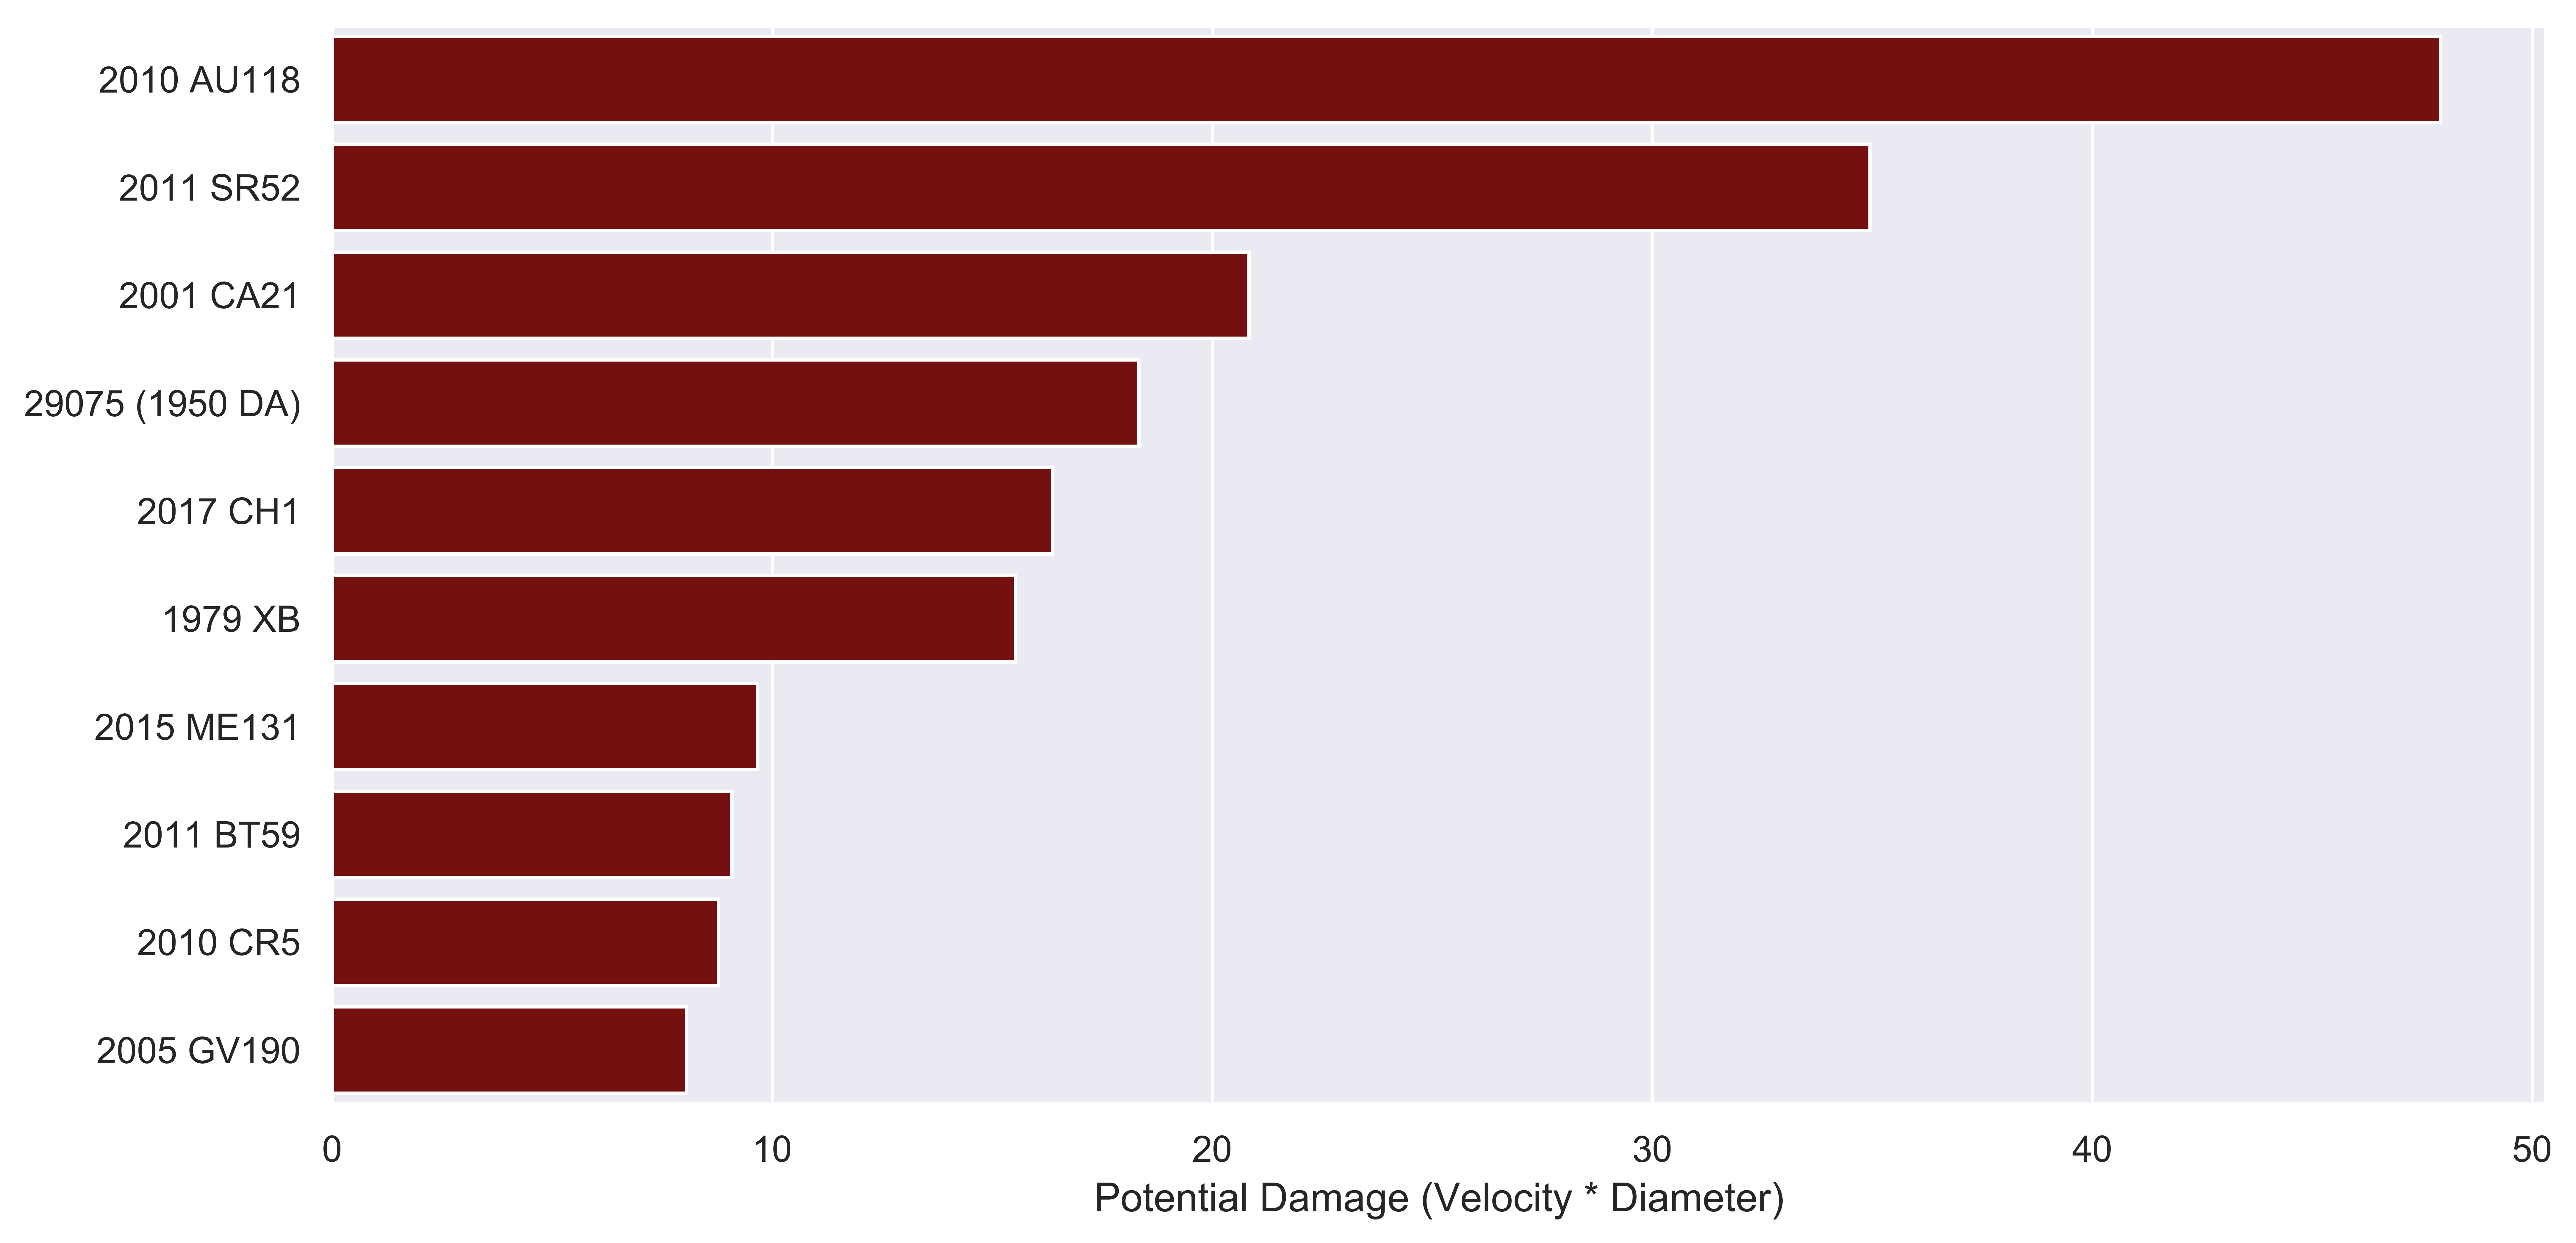

In [16]:
fig, ax = plt.subplots(1, 1, figsize = (12, 6), dpi=800)

sns.set(style="darkgrid")
sns.set_color_codes("dark")
asteroidplot = sns.barplot(x='Potential Damage', y='Object Name', data=topten, color = sns.xkcd_rgb["dark red"])

ax.set_ylabel('')    
ax.set_xlabel('Potential Damage (Velocity * Diameter)')

In [17]:
figure = asteroidplot.get_figure()    
figure.savefig('asteroid.png', dpi=800)